In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train =  pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

In [ ]:
df_train.shape

(373989, 9)

In [ ]:
df_train = df_train.iloc[:200000,:]

In [ ]:
df_train.shape

(200000, 9)

In [ ]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,31-03-2023 23:57,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,"ARREST, BOOKED",POTRERO AV / 21ST ST,-122.406803,37.757763
1,31-03-2023 23:55,DISORDERLY CONDUCT,COMMITTING PUBLIC NUISANCE,Tuesday,TARAVAL,NONE,2600 Block of 23RD AV,-122.479590,37.738186
2,31-03-2023 23:50,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Tuesday,PARK,NONE,1300 Block of HAIGHT ST,-122.444524,37.770370
3,31-03-2023 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,31-03-2023 23:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,PARK,NONE,1200 Block of GROVE ST,-122.437159,37.775975


In [ ]:
tmp_l = ['Date', 'Category', 'DayOfWeek', 'PdDistrict']

In [ ]:
df = df_train.iloc[:10000,:]
df=df_train.copy()

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,31-03-2023 23:57,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,"ARREST, BOOKED",POTRERO AV / 21ST ST,-122.406803,37.757763
1,31-03-2023 23:55,DISORDERLY CONDUCT,COMMITTING PUBLIC NUISANCE,Tuesday,TARAVAL,NONE,2600 Block of 23RD AV,-122.479590,37.738186
2,31-03-2023 23:50,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Tuesday,PARK,NONE,1300 Block of HAIGHT ST,-122.444524,37.770370
3,31-03-2023 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,31-03-2023 23:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,PARK,NONE,1200 Block of GROVE ST,-122.437159,37.775975


In [ ]:
df.Dates = pd.to_datetime(df.Dates)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       200000 non-null  datetime64[ns]
 1   Category    200000 non-null  object        
 2   Descript    200000 non-null  object        
 3   DayOfWeek   200000 non-null  object        
 4   PdDistrict  200000 non-null  object        
 5   Resolution  200000 non-null  object        
 6   Address     200000 non-null  object        
 7   X           200000 non-null  float64       
 8   Y           200000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 13.7+ MB


In [ ]:
df['Day'] = df['Dates'].dt.day_of_year

In [ ]:
!pip install geopandas

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-16-afea429f631a>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


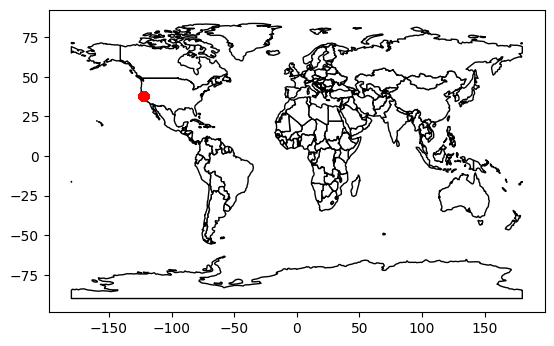

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')
plt.show()

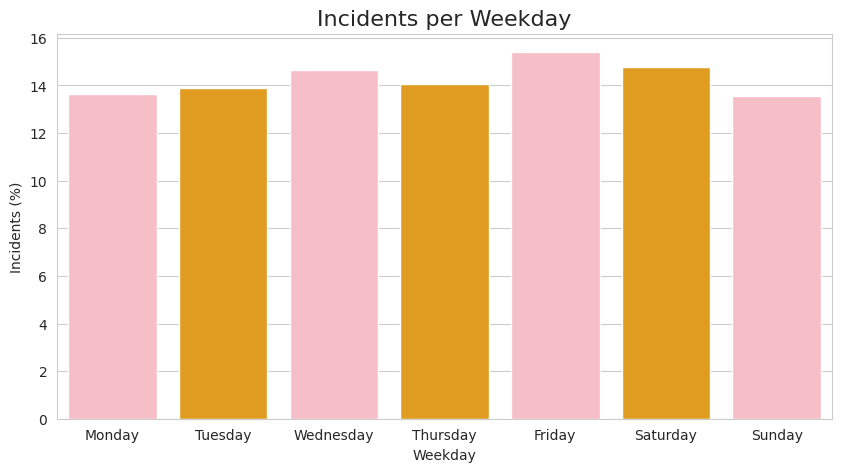

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

data = train.groupby('DayOfWeek').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])

# Define custom colors
custom_colors = ['#FFB6C1', '#FFA500']  # Light pink and orange

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        x=data.index, y=(data.values / data.values.sum()) * 100,
        orient='v',
        palette=custom_colors)  # Use custom colors

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

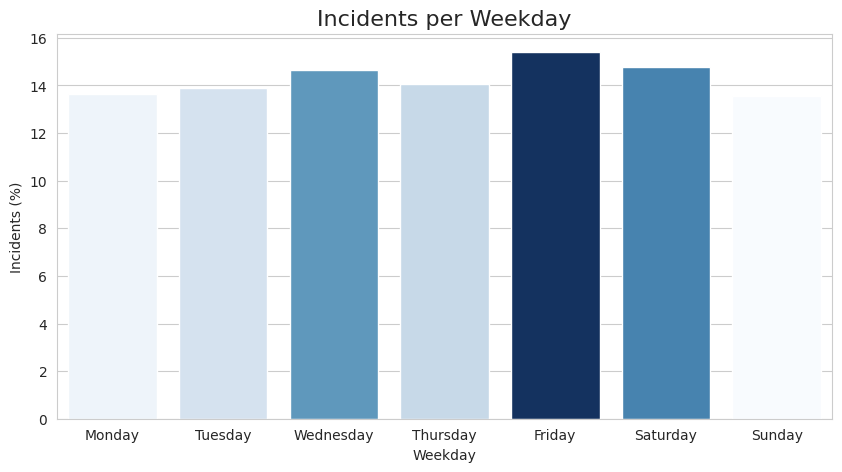

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

data = train.groupby('DayOfWeek').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        x=data.index, y=(data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Blues').to_rgba(data.values))  # Change colormap to 'Blues'

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


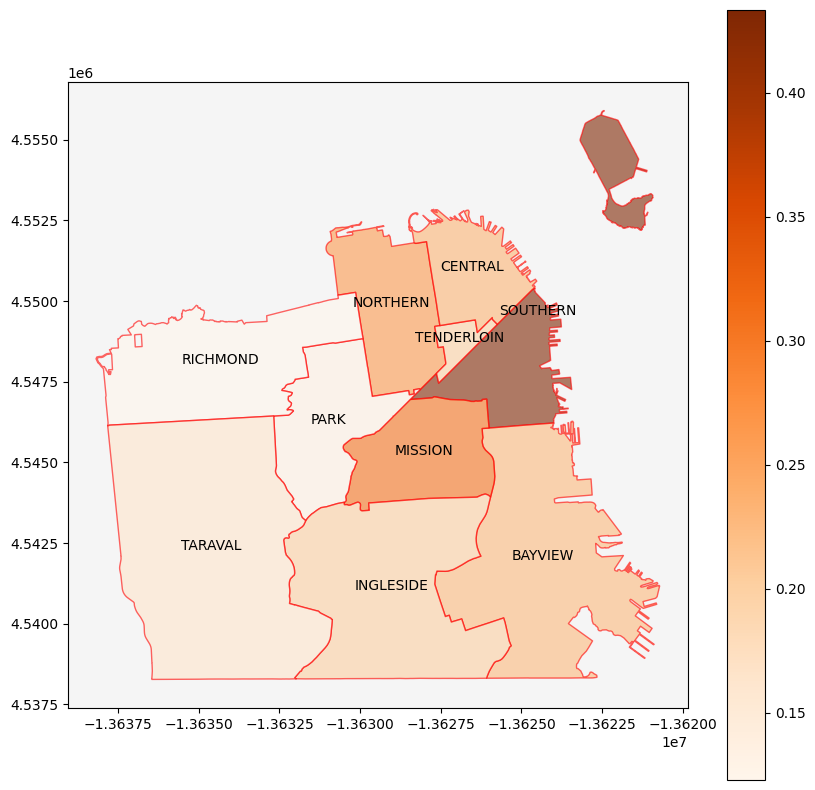

In [ ]:
import urllib.request
import shutil
import zipfile
import os
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Downloading the shapefile of the area
url = 'https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=Shapefile'
with urllib.request.urlopen(url) as response, open('pd_data.zip', 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

# Unzipping it
with zipfile.ZipFile('pd_data.zip', 'r') as zip_ref:
    zip_ref.extractall('pd_data')

# Loading to a geopandas dataframe
for filename in os.listdir('./pd_data/'):
    if re.match(".+\.shp", filename):
        pd_districts = gpd.read_file('./pd_data/'+filename)
        break

# Defining the coordinate system to longitude/latitude
pd_districts.crs = {'init': 'epsg:4326'}

# Merging our train dataset with the geo-dataframe
pd_districts = pd_districts.merge(
    train.groupby('PdDistrict').count().iloc[:, [0]].rename(
        columns={'Dates': 'Incidents'}),
    how='inner',
    left_on='district',
    right_index=True,
    suffixes=('_x', '_y'))

# Transforming the coordinate system to Spherical Mercator for compatibility with the tiling background
pd_districts = pd_districts.to_crs({'init': 'epsg:3857'})

# Calculating the incidents per day for every district
train_days = train.groupby('Dates').count().shape[0]
pd_districts['inc_per_day'] = pd_districts.Incidents/train_days

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
pd_districts.plot(
    column='inc_per_day',
    cmap='Oranges',
    alpha=0.6,
    edgecolor='r',
    linestyle='-',
    linewidth=1,
    legend=True,
    ax=ax)

# Adding the name of the districts
for index in pd_districts.index:
    plt.annotate(
        pd_districts.loc[index].district,
        (pd_districts.loc[index].geometry.centroid.x, pd_districts.loc[index].geometry.centroid.y),
        color='black',
        fontsize=10,
        ha='center')

# Changing the background color
ax.set_facecolor('#F5F5F5')  # Light gray color

plt.show()

In [ ]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Day'] = df['Dates'].dt.day_of_year

<Axes: title={'center': 'Most crimes on day of year'}, xlabel='Day of year', ylabel='Count of crime'>

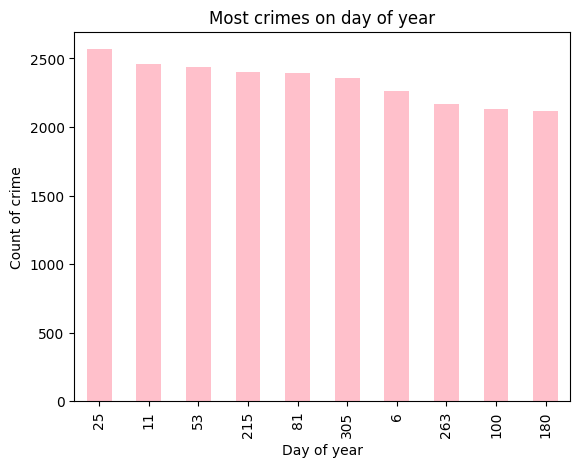

In [ ]:
df['Day'].value_counts().head(10).plot(kind='bar', color='pink', xlabel='Day of year', ylabel='Count of crime', title='Most crimes on day of year')

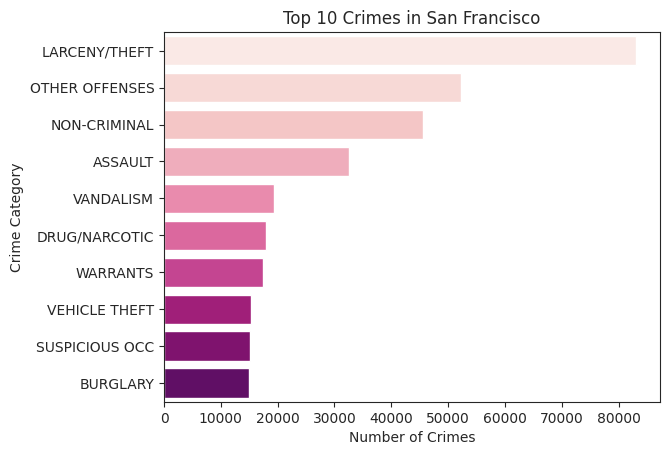

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to a sequential pink color map
custom_palette = sns.color_palette("RdPu", n_colors=10)

# Set the style to ticks
sns.set_palette(custom_palette)
sns.set_style("ticks")

top_crimes = df['Category'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.title('Top 10 Crimes in San Francisco')
plt.show()

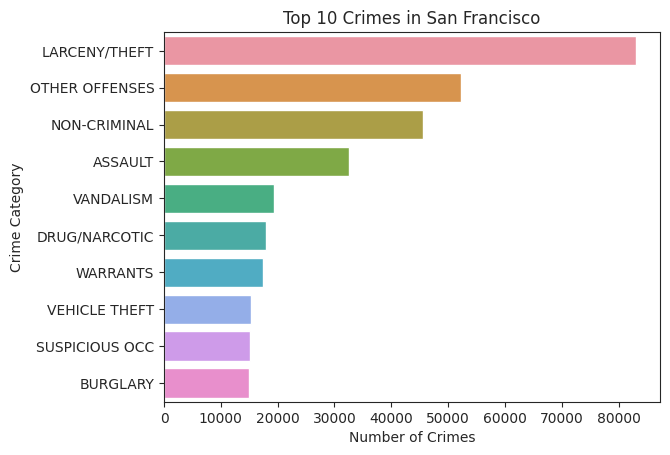

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of light colors
light_colors = ['#C6E2FF', '#C6FFDD', '#FFEBC6', '#FFC6C6', '#FFC6F9']

sns.set_palette(light_colors)
sns.set_style("ticks")

top_crimes = df['Category'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.title('Top 10 Crimes in San Francisco')
plt.show()

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Month'] = df['Dates'].dt.month

<Axes: title={'center': 'Most crimes on Month of year'}, xlabel='Month of year', ylabel='Count of crime'>

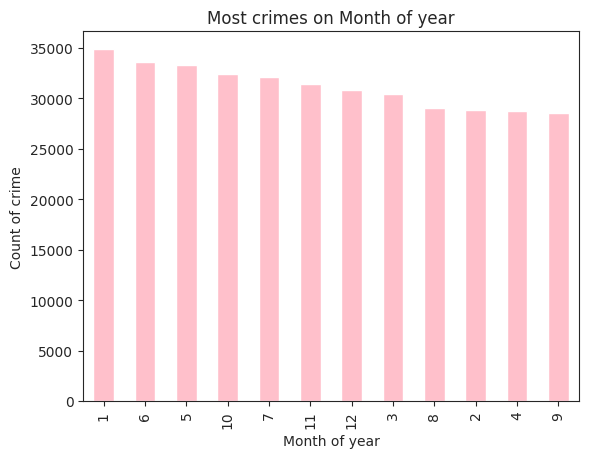

In [ ]:
df['Month'].value_counts().head(12).plot(kind='bar', color='pink', xlabel='Month of year', ylabel='Count of crime', title='Most crimes on Month of year')

In [ ]:
df.Address.head()

0        POTRERO AV / 21ST ST
1       2600 Block of 23RD AV
2     1300 Block of HAIGHT ST
3    1500 Block of LOMBARD ST
4      1200 Block of GROVE ST
Name: Address, dtype: object

In [ ]:
l = pd.Series(df.Address.head())

In [ ]:
l2 = pd.Series('9th st / folsom st')

In [ ]:
l = l.append(l2)

<ipython-input-49-d87c329f88c9>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(l2)


In [ ]:
l

0        POTRERO AV / 21ST ST
1       2600 Block of 23RD AV
2     1300 Block of HAIGHT ST
3    1500 Block of LOMBARD ST
4      1200 Block of GROVE ST
0          9th st / folsom st
dtype: object

In [ ]:
# for i in l
# l.apply(lambda x: x[1:] if x[0].isdigit() else x)
l.str.replace('\d+ ','', regex=True)

0    POTRERO AV / 21ST ST
1        Block of 23RD AV
2      Block of HAIGHT ST
3     Block of LOMBARD ST
4       Block of GROVE ST
0      9th st / folsom st
dtype: object

In [ ]:
df['Address'] = df.Address.str.replace('\d+ ','', regex=True)

<Axes: title={'center': 'Most crimes on area'}, xlabel='Most crime spot', ylabel='Count of crime'>

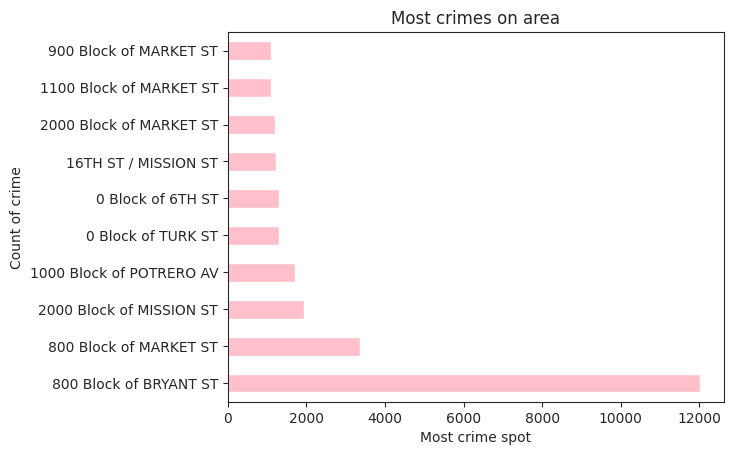

In [ ]:
df.Address.value_counts().head(10).plot(kind='barh', color='pink', xlabel='Most crime spot', ylabel='Count of crime', title='Most crimes on area')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       373989 non-null  datetime64[ns]
 1   Category    373989 non-null  object        
 2   Descript    373989 non-null  object        
 3   DayOfWeek   373989 non-null  object        
 4   PdDistrict  373989 non-null  object        
 5   Resolution  373989 non-null  object        
 6   Address     373989 non-null  object        
 7   X           373989 non-null  float64       
 8   Y           373989 non-null  float64       
 9   Day         373989 non-null  int64         
 10  Month       373989 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 31.4+ MB


In [ ]:
df['Day_of_week'] = df['Dates'].dt.dayofweek

<Axes: title={'center': 'Most crimes on day of week'}, xlabel='Most crime on day', ylabel='Count of crime'>

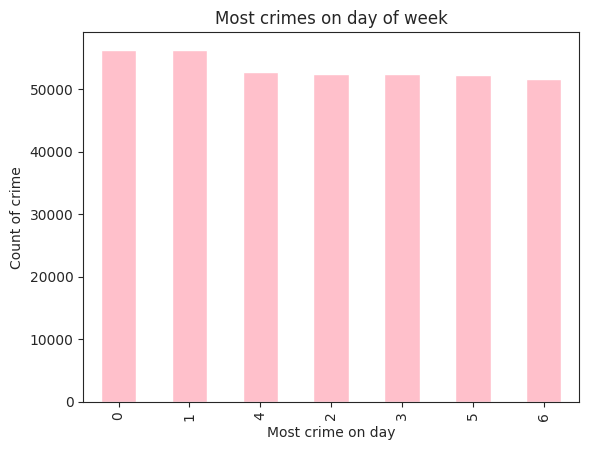

In [ ]:
df.Day_of_week.value_counts().plot(kind='bar', color='pink', xlabel='Most crime on day', ylabel='Count of crime', title='Most crimes on day of week')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Dates        373989 non-null  datetime64[ns]
 1   Category     373989 non-null  object        
 2   Descript     373989 non-null  object        
 3   DayOfWeek    373989 non-null  object        
 4   PdDistrict   373989 non-null  object        
 5   Resolution   373989 non-null  object        
 6   Address      373989 non-null  object        
 7   X            373989 non-null  float64       
 8   Y            373989 non-null  float64       
 9   Day          373989 non-null  int64         
 10  Month        373989 non-null  int64         
 11  Day_of_week  373989 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 34.2+ MB
